In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the time module.
import time



# Get today's date in seconds.
today = time.strftime("%x")
today

'07/18/21'

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | port hardy
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | ranot
Processing Record 13 of Set 1 | bubaque
Processing Record 14 of Set 1 | narasannapeta
Processing Record 15 of Set 1 | comodoro rivadavia
Processing Record 16 of Set 1 | nizwa
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | touros
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | gizo
Processing Record 22 of Set 1 | carnarvon
Processing Record 2

Processing Record 34 of Set 4 | arman
Processing Record 35 of Set 4 | mar del plata
Processing Record 36 of Set 4 | shiyan
Processing Record 37 of Set 4 | kazanka
Processing Record 38 of Set 4 | cap-aux-meules
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | mehamn
Processing Record 41 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 42 of Set 4 | lata
Processing Record 43 of Set 4 | trelew
Processing Record 44 of Set 4 | nata
Processing Record 45 of Set 4 | lebedinyy
Processing Record 46 of Set 4 | smithers
Processing Record 47 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 4 | khartoum
Processing Record 49 of Set 4 | dubenskiy
City not found. Skipping...
Processing Record 50 of Set 4 | hofn
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 5 | erenhot
Processing Record 4 of Set 5 | acapulco
Processing Record 5 of Set 5 

Processing Record 26 of Set 8 | nanortalik
Processing Record 27 of Set 8 | marystown
Processing Record 28 of Set 8 | muzaffarabad
Processing Record 29 of Set 8 | gazanjyk
Processing Record 30 of Set 8 | kampene
Processing Record 31 of Set 8 | bukama
Processing Record 32 of Set 8 | cayenne
Processing Record 33 of Set 8 | padang
Processing Record 34 of Set 8 | general roca
Processing Record 35 of Set 8 | paso de ovejas
Processing Record 36 of Set 8 | san rafael
Processing Record 37 of Set 8 | makakilo city
Processing Record 38 of Set 8 | axams
Processing Record 39 of Set 8 | mercedes
Processing Record 40 of Set 8 | saint-francois
Processing Record 41 of Set 8 | deh rawud
City not found. Skipping...
Processing Record 42 of Set 8 | mananara
Processing Record 43 of Set 8 | trairi
Processing Record 44 of Set 8 | sabinas hidalgo
Processing Record 45 of Set 8 | inta
Processing Record 46 of Set 8 | skjervoy
Processing Record 47 of Set 8 | sidhi
Processing Record 48 of Set 8 | bellevue
Processin

Processing Record 14 of Set 12 | tikrit
Processing Record 15 of Set 12 | saint-georges
Processing Record 16 of Set 12 | lasa
Processing Record 17 of Set 12 | barcelona
Processing Record 18 of Set 12 | ishigaki
Processing Record 19 of Set 12 | garissa
Processing Record 20 of Set 12 | uniontown
Processing Record 21 of Set 12 | grand centre
City not found. Skipping...
Processing Record 22 of Set 12 | ouango
Processing Record 23 of Set 12 | kouango
Processing Record 24 of Set 12 | constitucion
Processing Record 25 of Set 12 | urengoy
Processing Record 26 of Set 12 | chumikan
Processing Record 27 of Set 12 | villarrica
Processing Record 28 of Set 12 | san ramon de la nueva oran
Processing Record 29 of Set 12 | mandiana
Processing Record 30 of Set 12 | chodavaram
Processing Record 31 of Set 12 | darhan
Processing Record 32 of Set 12 | novoorsk
Processing Record 33 of Set 12 | lima
Processing Record 34 of Set 12 | northam
Processing Record 35 of Set 12 | mayo
Processing Record 36 of Set 12 | 

In [14]:
len(city_data)

573

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,72.18,78,87,9.08,US,2021-07-18 15:00:24
1,Mahebourg,-20.4081,57.7000,68.25,69,74,17.29,MU,2021-07-18 15:00:31
2,Geraldton,-28.7667,114.6000,57.61,88,75,6.91,AU,2021-07-18 15:00:32
3,Avarua,-21.2078,-159.7750,75.25,83,11,5.75,CK,2021-07-18 15:00:33
4,New Norfolk,-42.7826,147.0587,50.72,80,100,1.01,AU,2021-07-18 15:00:33
5,Ushuaia,-54.8000,-68.3000,40.66,70,75,17.27,AR,2021-07-18 14:56:34
6,Thompson,55.7435,-97.8558,53.80,57,100,7.94,CA,2021-07-18 15:00:33
7,Port Hardy,50.6996,-127.4199,54.73,81,70,2.95,CA,2021-07-18 15:00:35
8,Salalah,17.0151,54.0924,78.03,91,85,8.70,OM,2021-07-18 15:00:35
9,Atuona,-9.8000,-139.0333,77.67,73,23,28.01,PF,2021-07-18 15:00:35


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-07-18 15:00:24,42.0970,-79.2353,72.18,78,87,9.08
1,Mahebourg,MU,2021-07-18 15:00:31,-20.4081,57.7000,68.25,69,74,17.29
2,Geraldton,AU,2021-07-18 15:00:32,-28.7667,114.6000,57.61,88,75,6.91
3,Avarua,CK,2021-07-18 15:00:33,-21.2078,-159.7750,75.25,83,11,5.75
4,New Norfolk,AU,2021-07-18 15:00:33,-42.7826,147.0587,50.72,80,100,1.01
5,Ushuaia,AR,2021-07-18 14:56:34,-54.8000,-68.3000,40.66,70,75,17.27
6,Thompson,CA,2021-07-18 15:00:33,55.7435,-97.8558,53.80,57,100,7.94
7,Port Hardy,CA,2021-07-18 15:00:35,50.6996,-127.4199,54.73,81,70,2.95
8,Salalah,OM,2021-07-18 15:00:35,17.0151,54.0924,78.03,91,85,8.70
9,Atuona,PF,2021-07-18 15:00:35,-9.8000,-139.0333,77.67,73,23,28.01


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


## Data plots

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

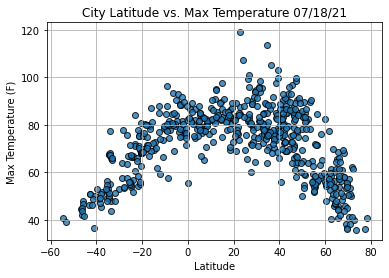

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

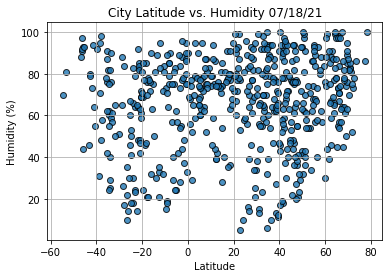

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

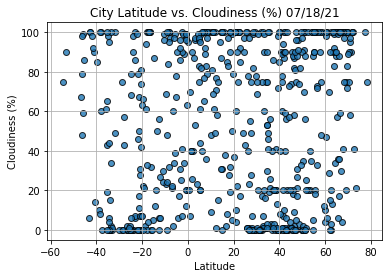

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

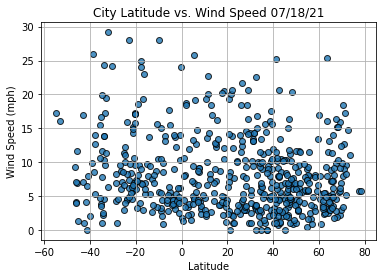

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()